# K-means

### Econom_Cities_data

In [1]:
#  Активируем библиотеки

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import os

In [2]:
#  Активируем процедуру для стандартизации данных
from sklearn import preprocessing

#  Будем использовать процедуру KMeans из библиотеки sklearn
from sklearn.cluster import KMeans

In [4]:
#  Задаем рабочую папку
os.chdir('/Users/kchendemer/Documents/analytics python/claster_analysis_labs/')

In [5]:
# Считываем файл Econom_Cities_data, обозначаем колонку City индексом
df = pd.read_csv('Econom_Cities_data.csv', sep=';', index_col= 'City')

In [6]:
# С иерархического анализа нам уже известно о выбросах, поэтому сразу удаляем их
df = df.drop(["Cairo", "Jakarta"])

In [7]:
# Также сразу меняем тип данных
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Salary'] = df['Salary'].str.replace(',', '.').astype(float)

Данные сильно разбросаны и прежде чем использовать кластеризации необходимо их нормализировать

Формула нормализации данных: $z = (x - mean) / std$

In [8]:
# Выбираем вариант стандартизации
stand = preprocessing.StandardScaler()

# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand.fit(df)

# преобразуем данные - получаем матрицу класса numpy.ndarray
stand_matrix = stand.transform(df)

# Преобразуем её в датафрейм
df_stand = pd.DataFrame(stand_matrix, index=df.index, columns=df.columns)

Теперь данные готовы для кластеризации <br>
Данных у нас не так много, поэтому пока возьмем диапазон от 2 до половины имеющихся данных

In [9]:
K = range(2, 23)

In [10]:
# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df_stand) for k in K]

#  Качество кластеризации вычисляется в model.inertia_
dist = [model.inertia_ for model in models]

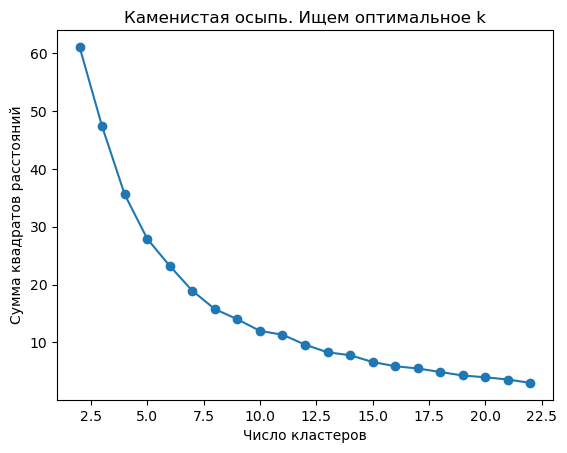

In [11]:
# Строим график каменистая осыпь

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Можно заметить, что после 5 расстояние между кластерами заметно снижается, а значит эта зона чересчур сильной детализации по кластерам, которая нам не нужна<br>
Рассмотрим 5 кластеров

In [12]:
# Строим модель на 5 кластарах, добавляем деление в наш изначальный датафрейм и рассматриваем получившиеся кластеры

model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(df_stand)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2146.875000,48.762500,12.412500
1,1990.833333,77.233333,55.316667
2,1732.000000,78.135714,53.614286
3,1868.750000,52.158333,17.458333
4,1780.500000,108.550000,71.300000


**Итого получаем следующие кластеры:** <br> 
1. Самое большое кол-во рабочих часов, при самых низких зарплатах и ценах - *много работы, мало денег*
2. Кол-во рабочих часов чуть меньше, при этом зарплаты и цены гораздо выше - *много работы, достаточно денег*
3. Кол-во рабочих часов самое наименьшее, но этом зарплаты и цены выше среднего - *мало работы, достаточно денег*
4. Кол-во рабочих часов среднее, при этом низкие зарплаты и цены - *работы достаточно, мало денег*
5. Кол-во рабочих часов чуть меньше, при этом самые высокие зарплаты и цены - *работы мало, денег много*